In [1]:
import hypernetx as hnx
import matplotlib.pyplot as plt

import numpy as np

import warnings 
warnings.simplefilter('ignore')

# Data

The data in several of our notebooks are taken from the jean.dat dataset available from the Stanford GraphBase at https://www-cs-faculty.stanford.edu/~knuth/sgb.html. This data gives character scene incidence information from the novel Les Miserables by Victor Hugo.

In [2]:
scenes = {
    0: ('FN', 'TH'),
    1: ('TH', 'JV'),
    2: ('BM', 'FN', 'JA'),
    3: ('JV', 'JU', 'CH', 'BM'),
    4: ('JU', 'CH', 'BR', 'CN', 'CC', 'JV', 'BM'),
    5: ('TH', 'GP'),
    6: ('GP', 'MP'),
    7: ('MA', 'GP')
}

H = hnx.Hypergraph(scenes)

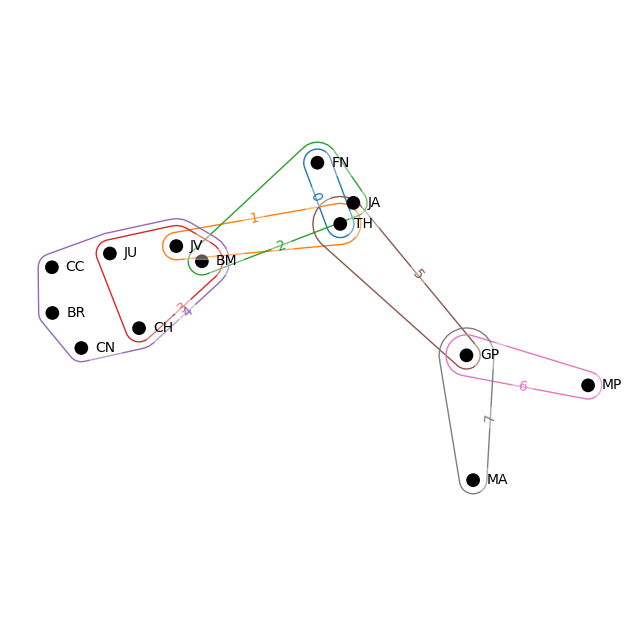

In [3]:
hnx.draw(H)

# Advanced Visualization Parameters

This helper function loads the three main visualizations using the hypergraph and keyword arguments as inputs. All visualizations can be updated dynamically through a single kwargs input, ensuring a consistent and flexible approach to modifying their settings.

In [4]:
def draw_each(H, **kwargs):
    plt.figure(figsize=(18, 6))

    plt.subplot(131)
    plt.title('Euler Style')
    hnx.draw(H, **kwargs)
    
    plt.subplot(132)
    plt.title('Two-Column Style (new)')
    hnx.draw_bipartite_using_euler(H, **kwargs)
    
    plt.subplot(133)
    plt.title('Incidence/UpSet Style (new)')
    hnx.draw_incidence_upset(
        H, edge_labels_on_axis=False,
        **kwargs
    )

    plt.show()

### Disabling labels
If edge or node labels are unnecessary or distracting, they can be completely turned off by setting `with_edge_labels` or `with_node_labels` to False. This removes the corresponding labels from the visualization, allowing for a cleaner and less cluttered representation.

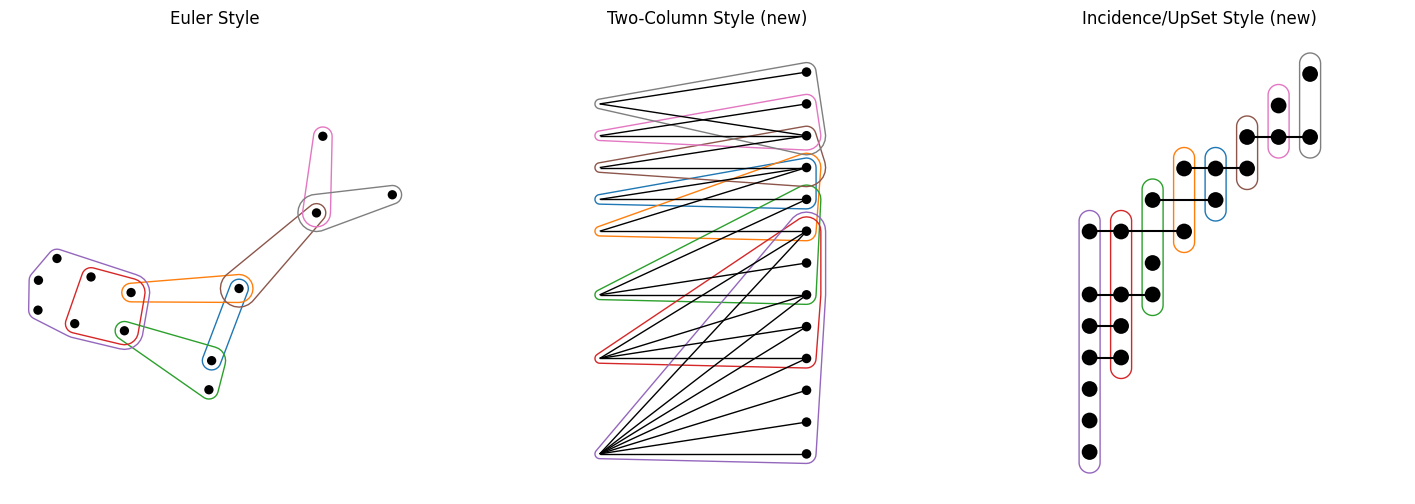

In [5]:
draw_each(H, with_edge_labels=False, with_node_labels=False)

## Colors
Properties like colors and thickness can be adjusted. This allows style parameters to be passed directly to the corresponding Matplotlib function. The mapping is as follows:
* `edges_kwargs` => `matplotlib.collections.PolyCollection`
* `nodes_kwargs` => `matplotlib.collections.PolyCollection`
* `edge_labels_kwargs` => `matplotlib.annotate`
* `node_labels_kwargs` => `matplotlib.annotate`

By default, edges cycle through one of 10 unique colors, while nodes are colored black. This behavior can be customized using the `edges_kwargs` and `nodes_kwargs` parameters.

* Pass a **String** to set a specific color for all nodes or edges.
* Pass an **Array**, **Dictionary**, or **Function** (using Matplotlib colors) to assign individual colors to nodes or edges dynamically.

These options provide flexibility in adjusting the visualization’s color scheme based on specific preferences or data characteristics.

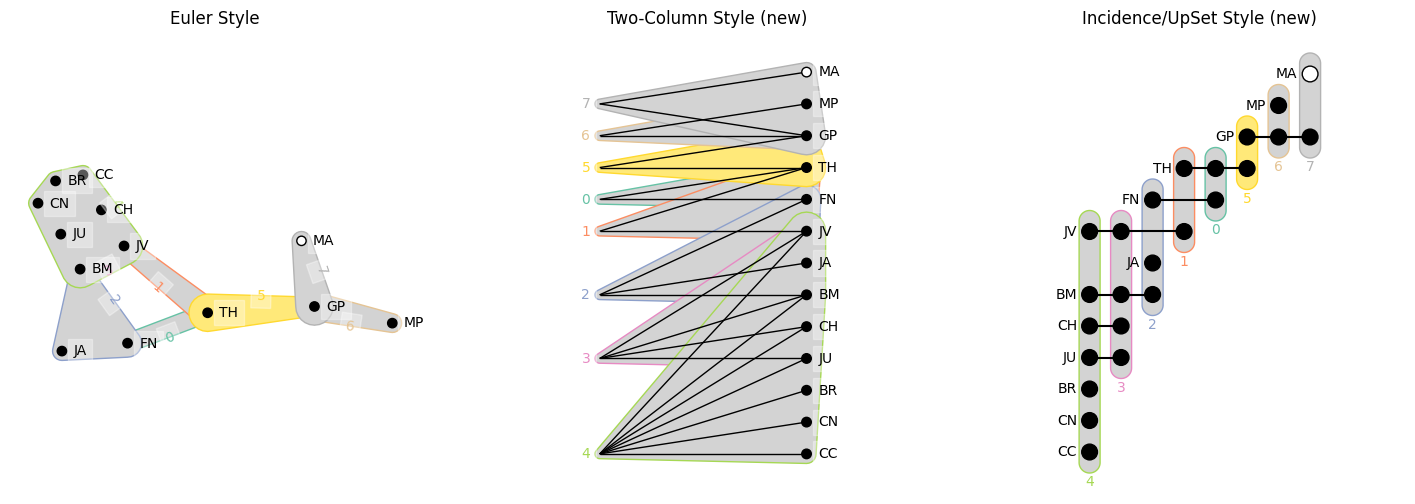

In [6]:
draw_each(
    H,
    nodes_kwargs={
        'facecolors': lambda n: 'white' if n=='MA' else 'black',
        'edgecolors': 'black'
    },
    edges_kwargs={
        'facecolors': ['#ffe979' if e==5 else '#d3d3d3' for e in H.edges()],
        'edgecolors': {e: plt.cm.Set2(e) for e in H.edges()},
        'linewidths': 2
    }
)

### String

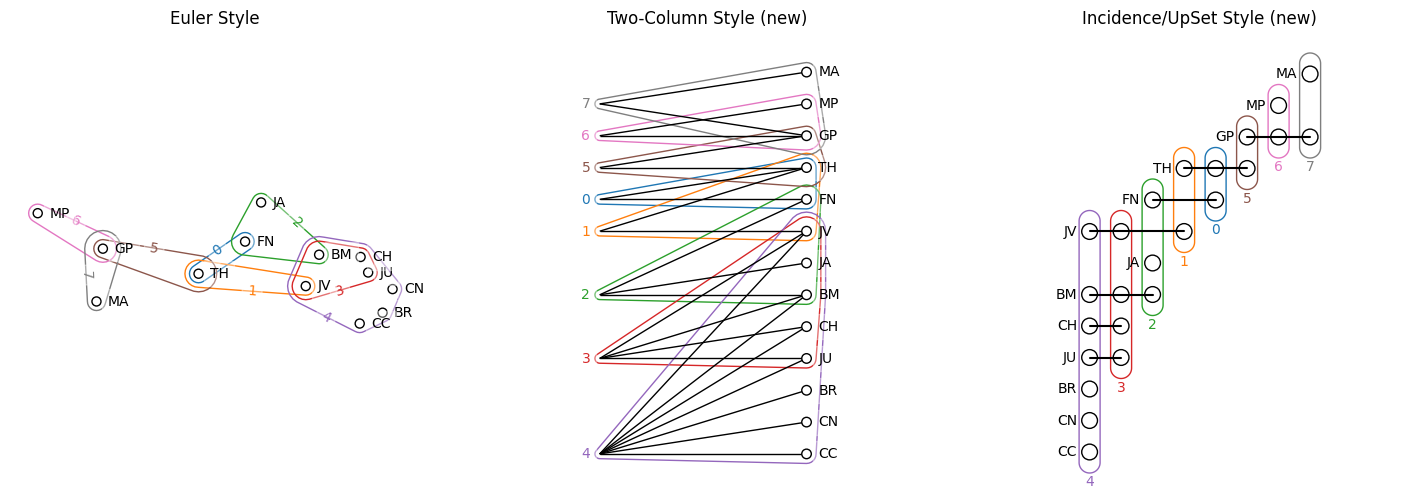

In [7]:
draw_each(
    H,
    nodes_kwargs={
        'facecolors': 'white',
        'edgecolors': 'black'
    }
)

In this example, we are using collapsed nodes using `collapse_nodes` to show edge color changes using a string.

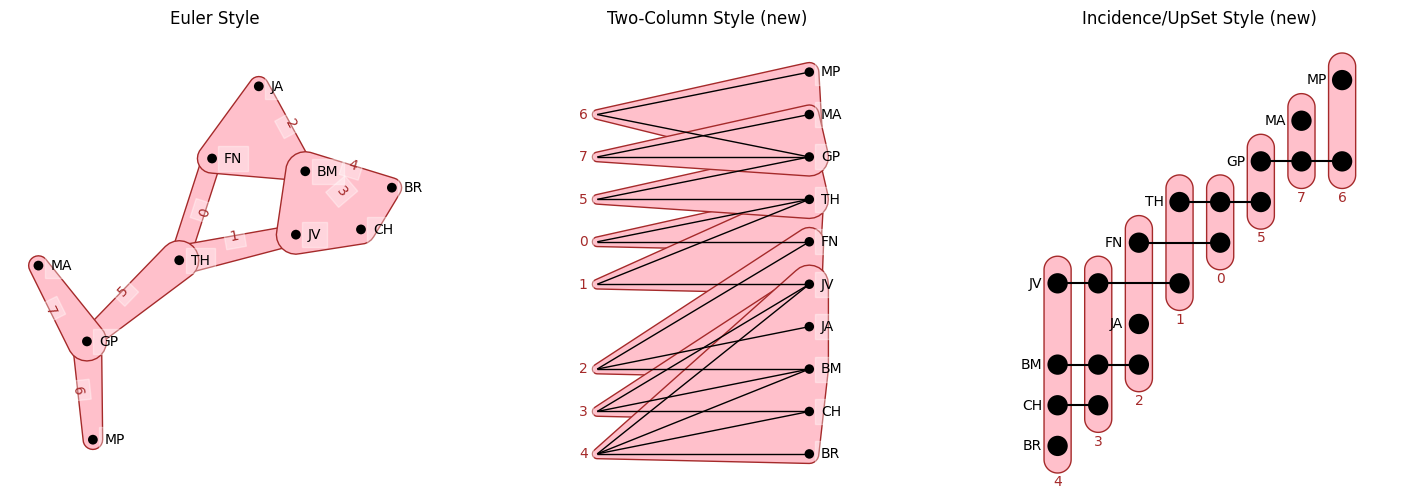

In [8]:
H_collapsed, eq = H.collapse_nodes(return_equivalence_classes=True)

draw_each(H_collapsed,
    edges_kwargs={
        'linewidths': 2,
        'edgecolors': 'brown',
        'facecolors': 'pink'
    }
)

### Array

In this example, collapsed nodes containing more than one node are colored red. This helps visually distinguish aggregated nodes from individual ones, making the structure of the hypergraph clearer.

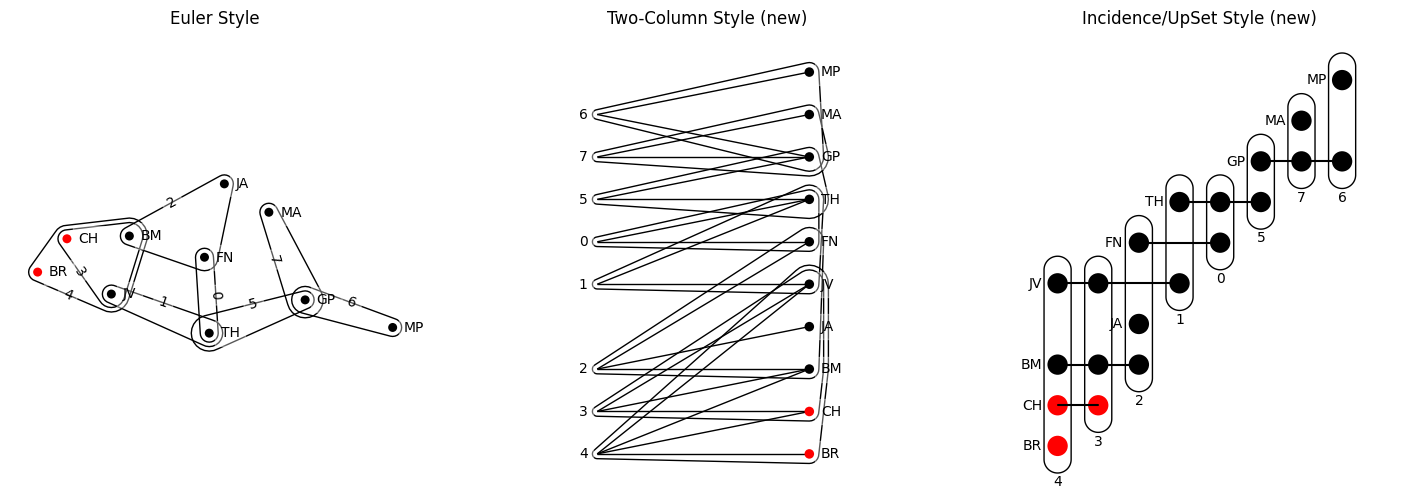

In [9]:
colors = [
    'red' if len(eq[v]) > 1 else 'black'
    for v in H_collapsed
]

draw_each(
    H_collapsed,
    edges_kwargs={
     'edgecolors': 'black'
    },
    nodes_kwargs={
     'facecolors': colors
    }
)

Edges are colored based on their normalized size using the Blues color palette. This provides a gradient effect where larger edges appear in darker shades, making it easier to interpret the relative sizes of edges within the visualization.

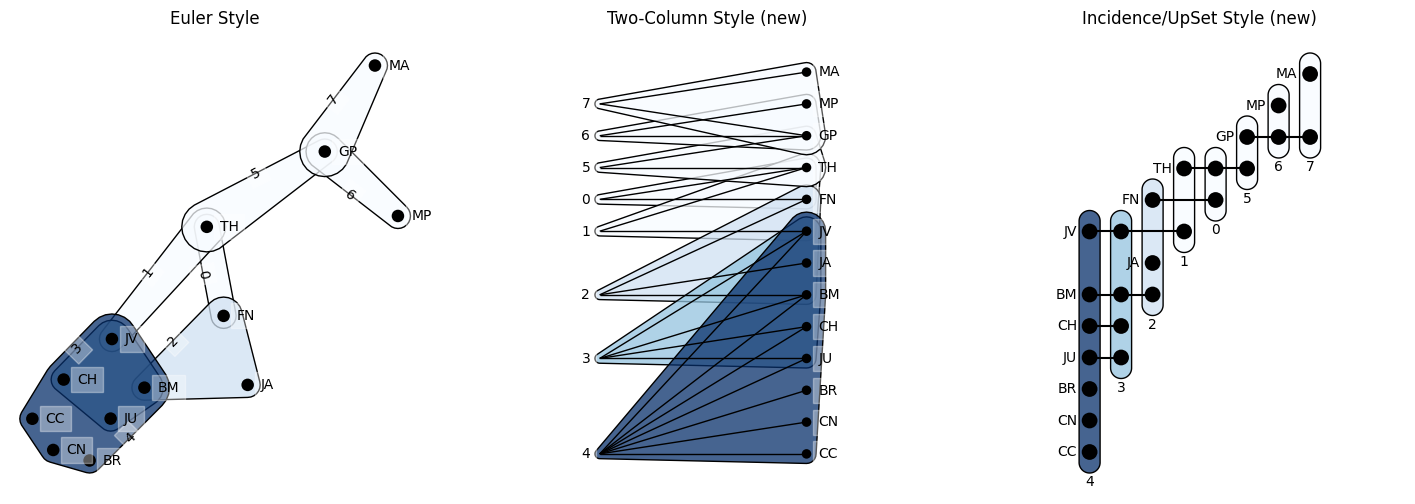

In [10]:
cmap = plt.cm.Blues
alpha = .75

sizes = [H.size(e) for e in H.edges()]
norm = plt.Normalize(min(sizes), max(sizes))

draw_each(H,
    edges_kwargs={
        'facecolors': cmap(norm(sizes))*(1, 1, 1, alpha),
        'edgecolors': 'black',
        'linewidths': 2
    }
)

### Dictionary

Here, we set the node fill as white if 'A' is included in the nodes, and black otherwise.

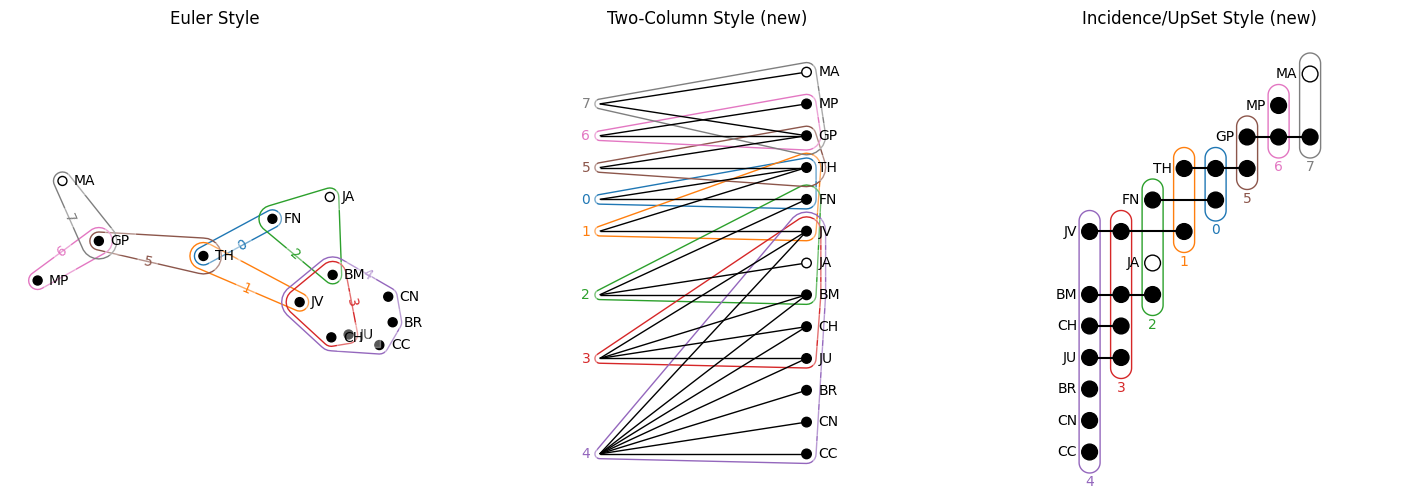

In [11]:
draw_each(
    H,
    nodes_kwargs={
        'facecolors': lambda n: 'white' if 'A' in n else 'black',
        'edgecolors': 'black'
    }
)

Using a color palette from the Matplotlib library, we assign colors for edge fill depending on its size.

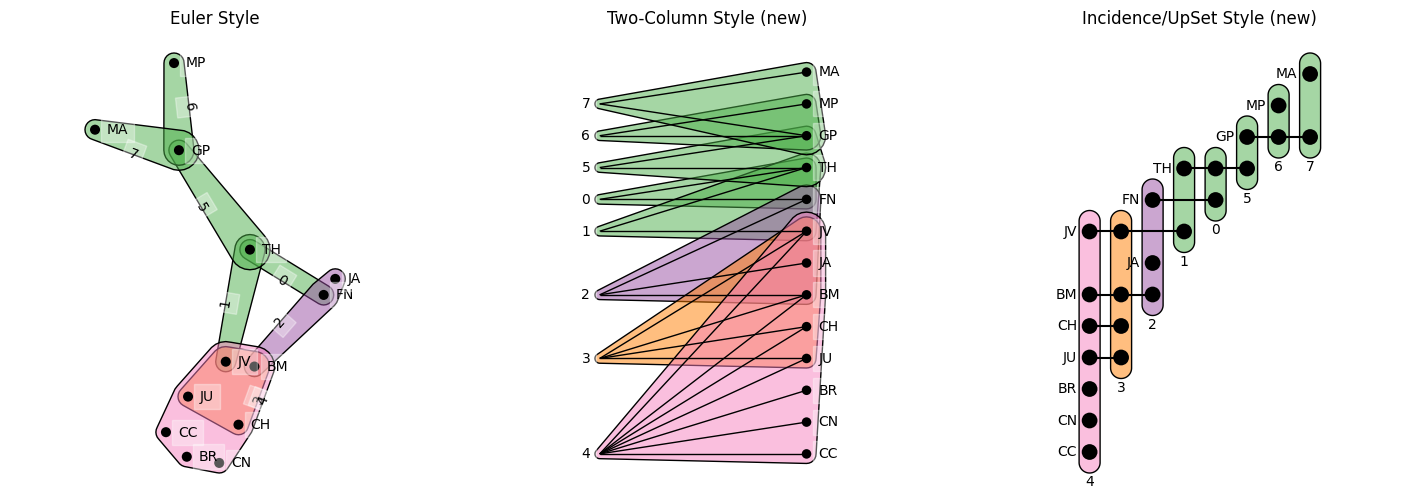

In [12]:
draw_each(H,
    edges_kwargs={
        'linewidths': 2,
        'edgecolors': 'black',
        'facecolors': {e: plt.cm.Set1(H.size(e)) + np.array([0, 0, 0, -.5]) for e in H.edges()}
    }
)

### Function

Using a function, we color nodes with the letter 'J' included as white and others as black.

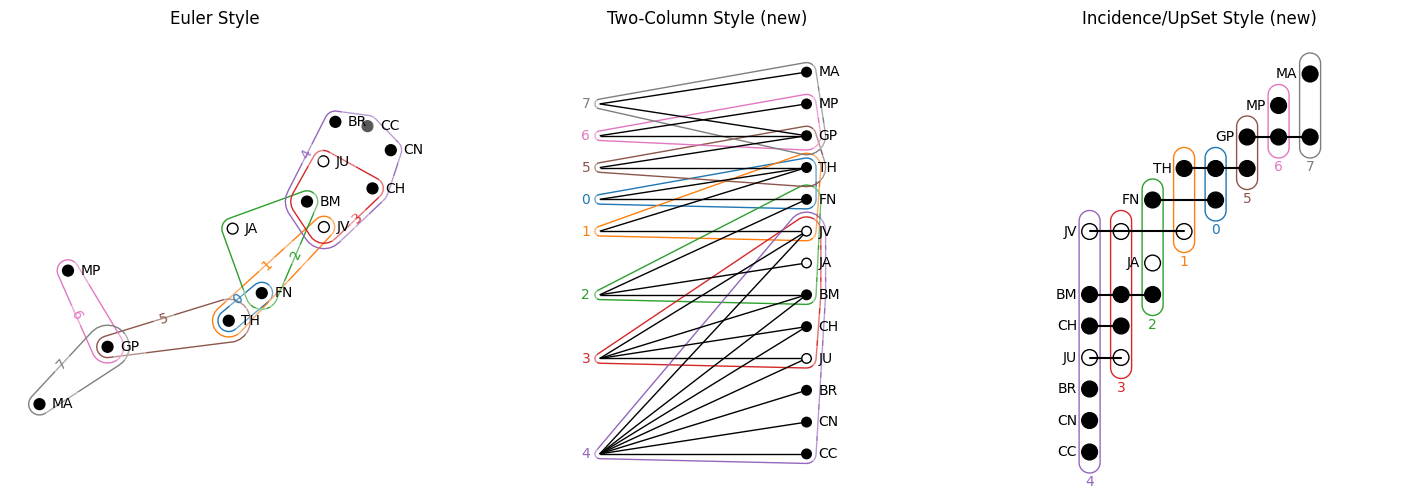

In [13]:
draw_each(
    H,
    nodes_kwargs={
        'facecolors': lambda n: 'white' if 'J' in n else 'black',
        'edgecolors': 'black'
    }
)

Set edge colors by passing in a new color palette from the Matplotlib library.

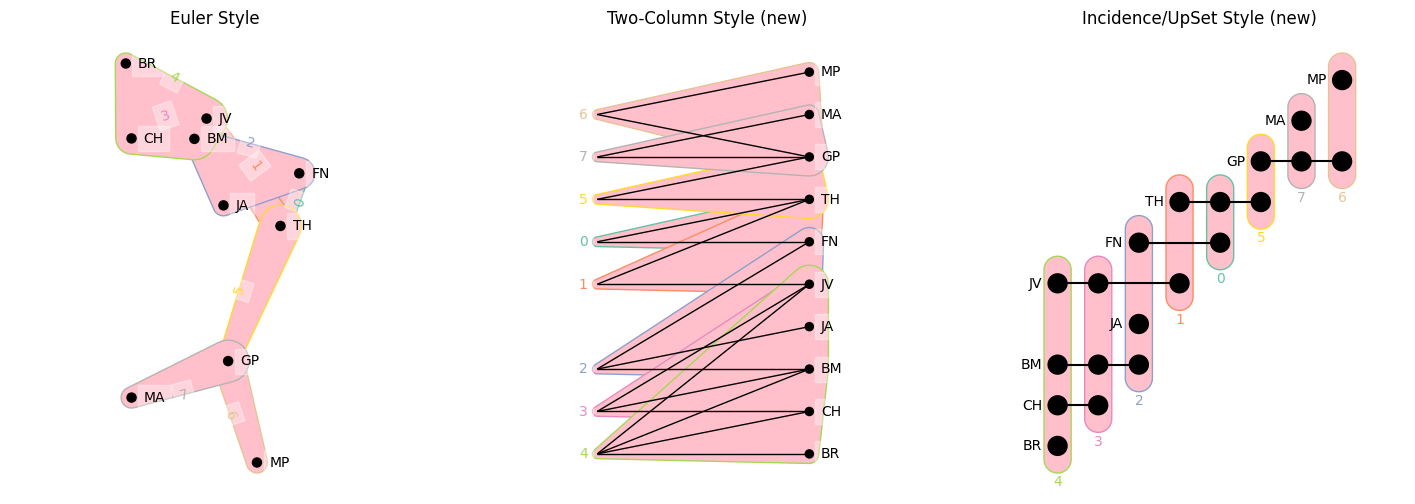

In [14]:
draw_each(H_collapsed,
    edges_kwargs={
        'linewidths': 2,
        'edgecolors': lambda e: plt.cm.Set2(e),
        'facecolors': 'pink'
    }
)

## Node Size
The `node_radius` parameter allows for the adjustment of node sizes within the visualization. Due to layout constraints, the `node_radius` value must be set within the range of 0 to 1.

If no value is specified, the default `node_radius` is 1. Users can customize this parameter using various input types:
* **Int/Float**: Assigns a uniform size to all nodes.
* **Array**, **Dictionary**, or **Function**: Enables dynamic assignment of node sizes, allowing for variation based on specific attributes.

This flexibility ensures better control over node representation within the visualization framework.

### Int/Float

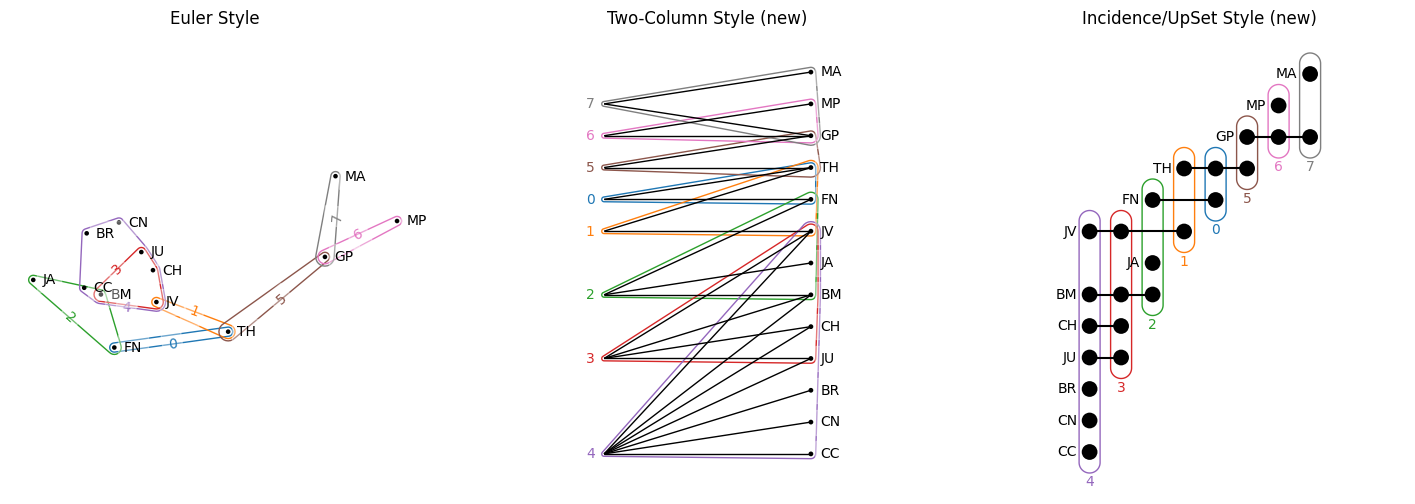

In [15]:
draw_each(H, node_radius=0.5)

### Array

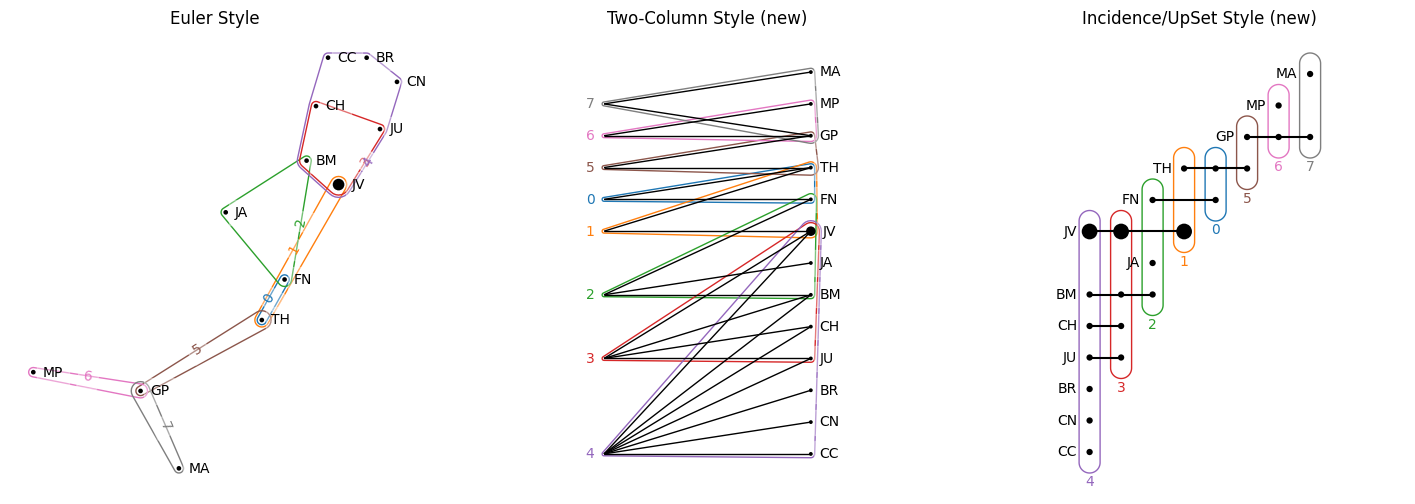

In [16]:
draw_each(H, node_radius=[1 if v == 'JV' else 0.4 for v in H])

### Dictionary

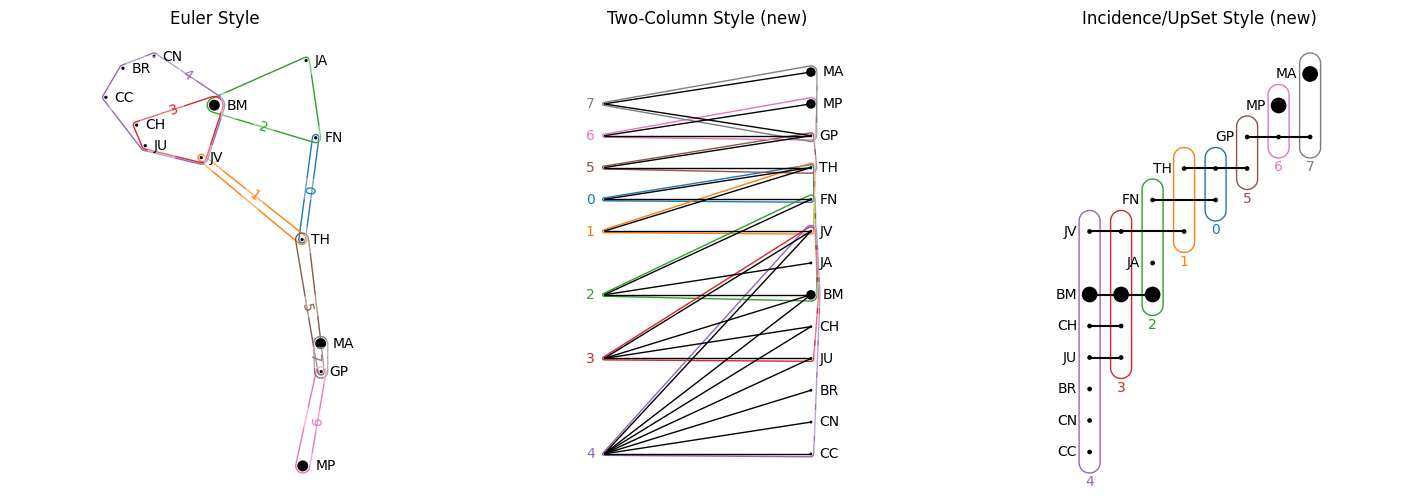

In [17]:
draw_each(H, node_radius={v: 1 if 'M' in v else 0.3 for v in H})

### Function

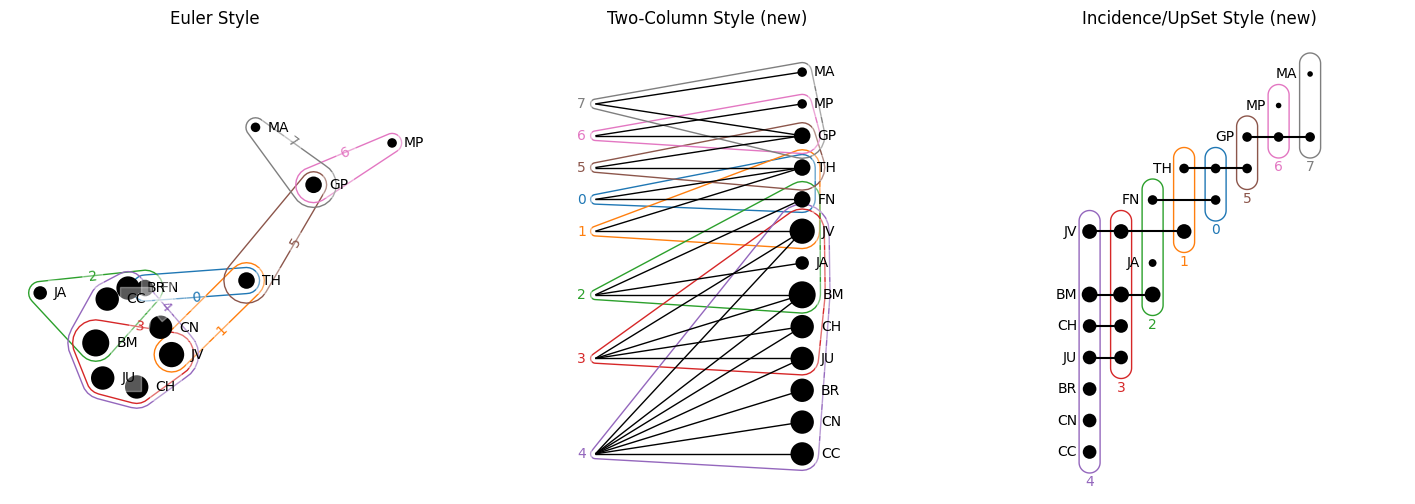

In [18]:
draw_each(H, node_radius=lambda v: len(H[v])**.5)

## Font size
Fontsize can be set with the `node_labels_kwargs` and `edge_labels_kwargs` parameters. Font sizes of all nodes/edges can be modified using an **Integer**. Individual colors can be set by passing in an **Array** of font values, a **Dictionary** mapping nodes/edges to values, or a **Function** setting values with nodes/edges.

### Int

Here we set the nodes font size at 18 to make the nodes appear large for illustrative purposes.

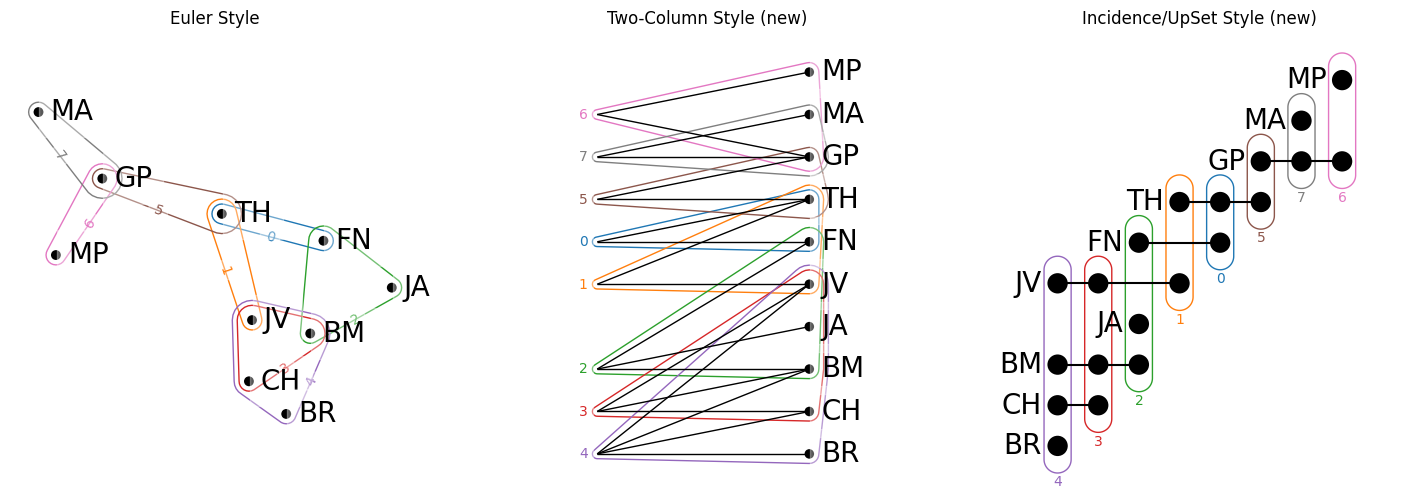

In [19]:
draw_each(H.collapse_nodes(),
    node_labels_kwargs={
        'fontsize': 20
    }
)

### Array

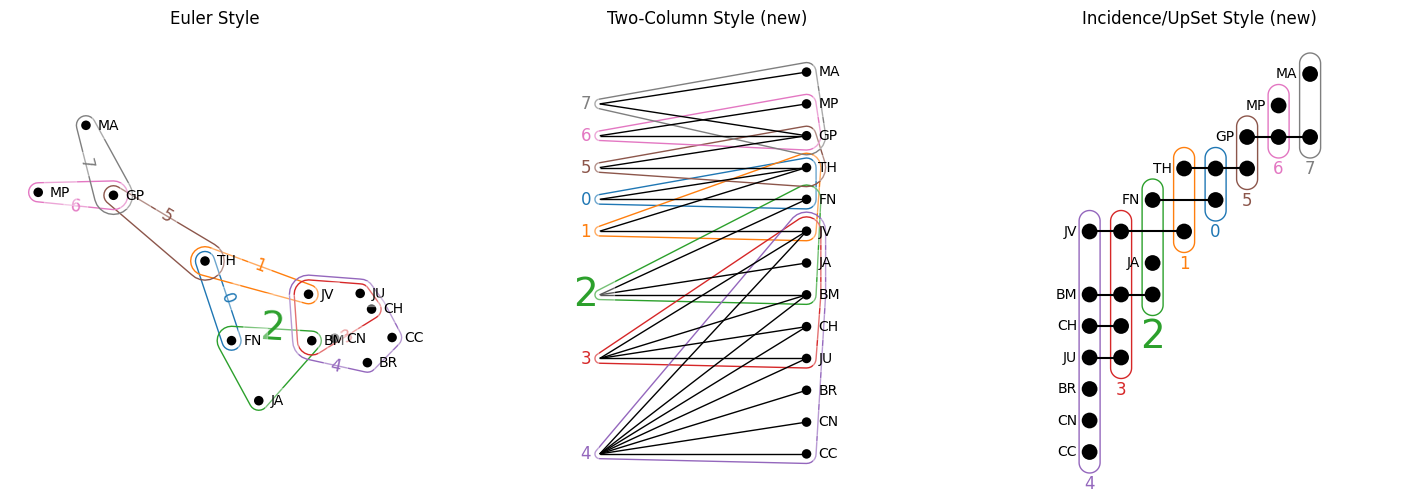

In [20]:
draw_each(H, 
    edge_labels_kwargs={'fontsize': [28 if v==2 else 12 for v in H.edges()]}
)

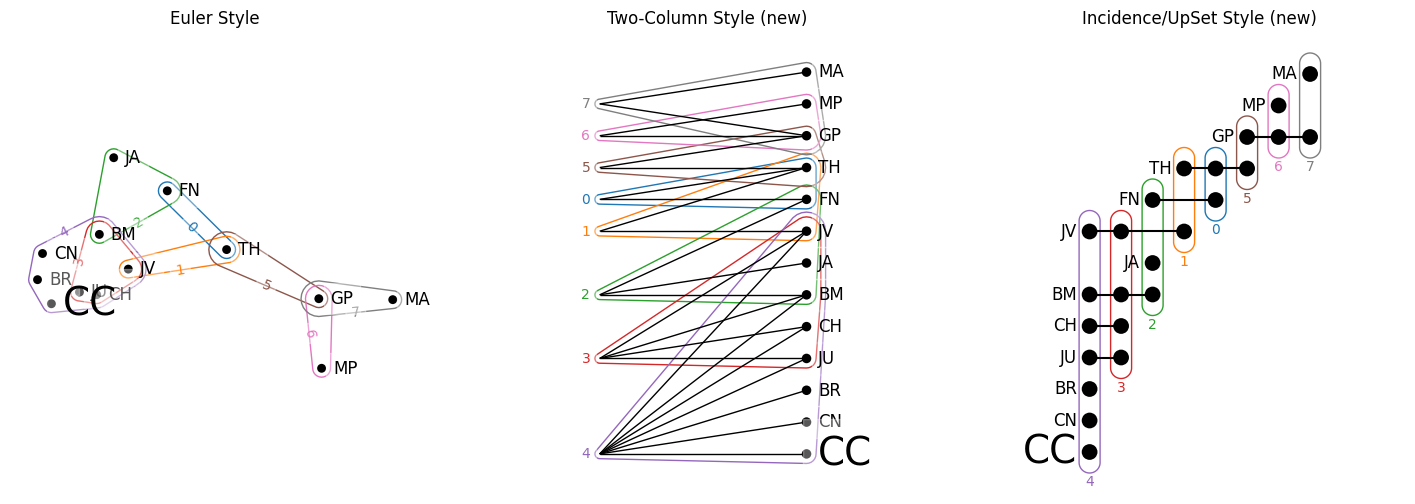

In [21]:
draw_each(H, 
    node_labels_kwargs={'fontsize': [28 if v=='CC' else 12 for v in H]}
)

### Dictionary

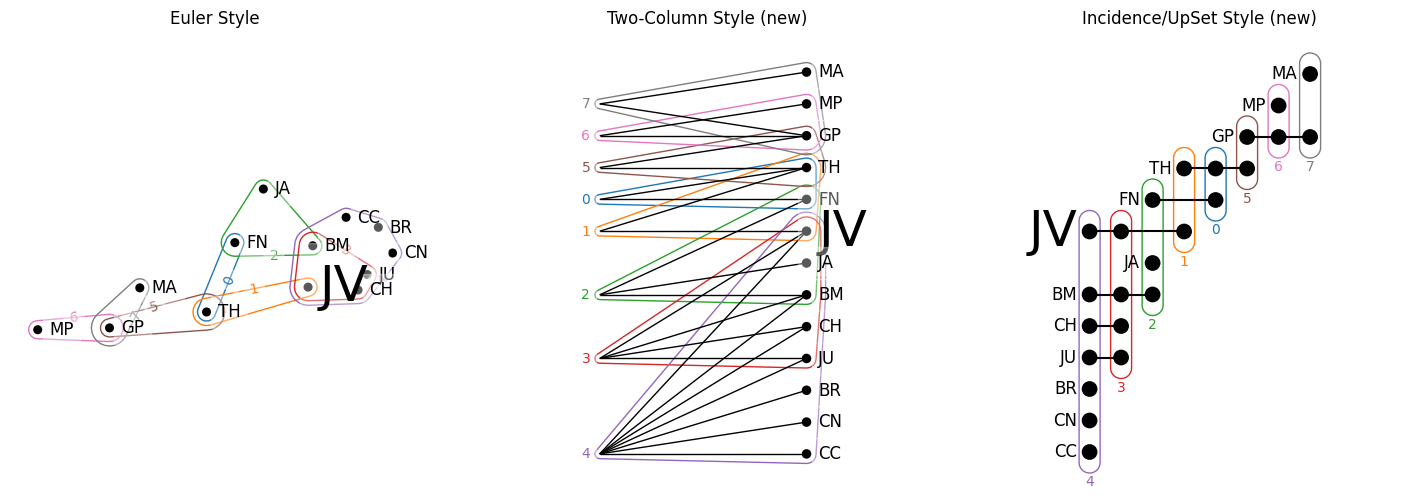

In [22]:
draw_each(H,
    node_labels_kwargs={
        'fontsize': {
            v: 36 if v == 'JV' else 12 for v in H
        }
    }
)

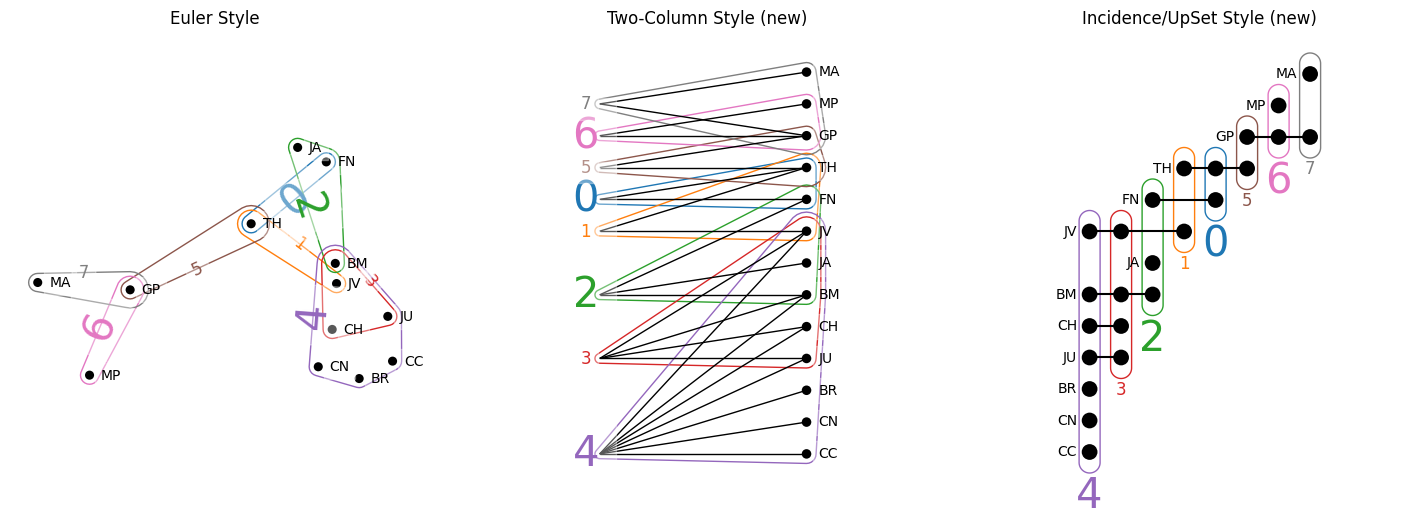

In [23]:
draw_each(H,
    edge_labels_kwargs={
        'fontsize': {
            v: 30 if v%2 == 0 else 12 for v in H.edges()
        }
    })

### Function

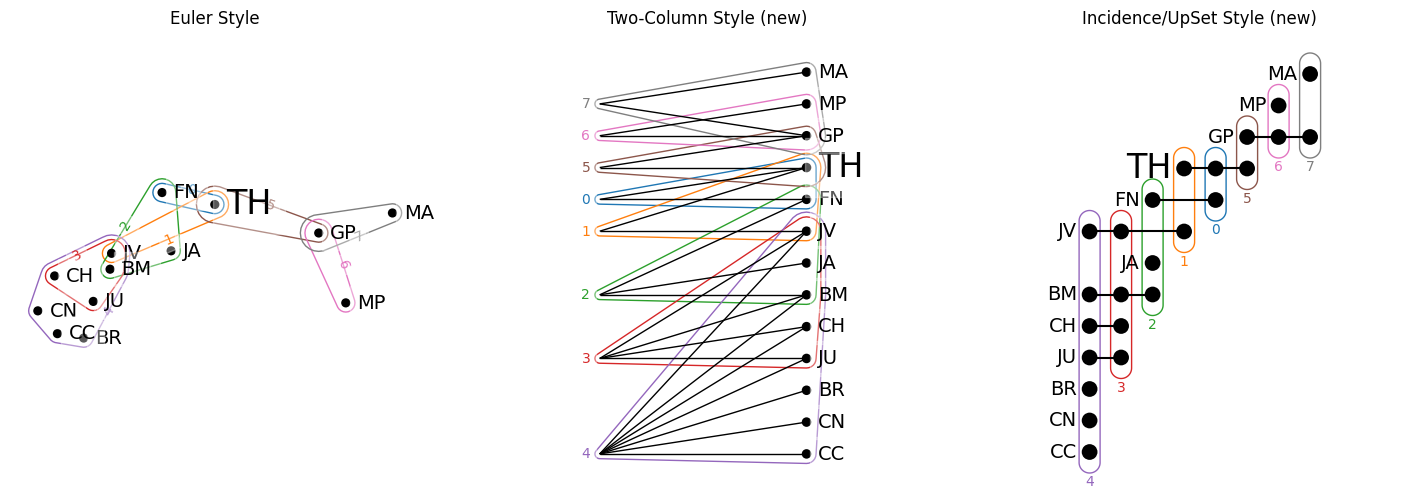

In [24]:
draw_each(H,
    node_labels_kwargs={
        'fontsize': lambda x: 24 if x=='TH' else 14
    })

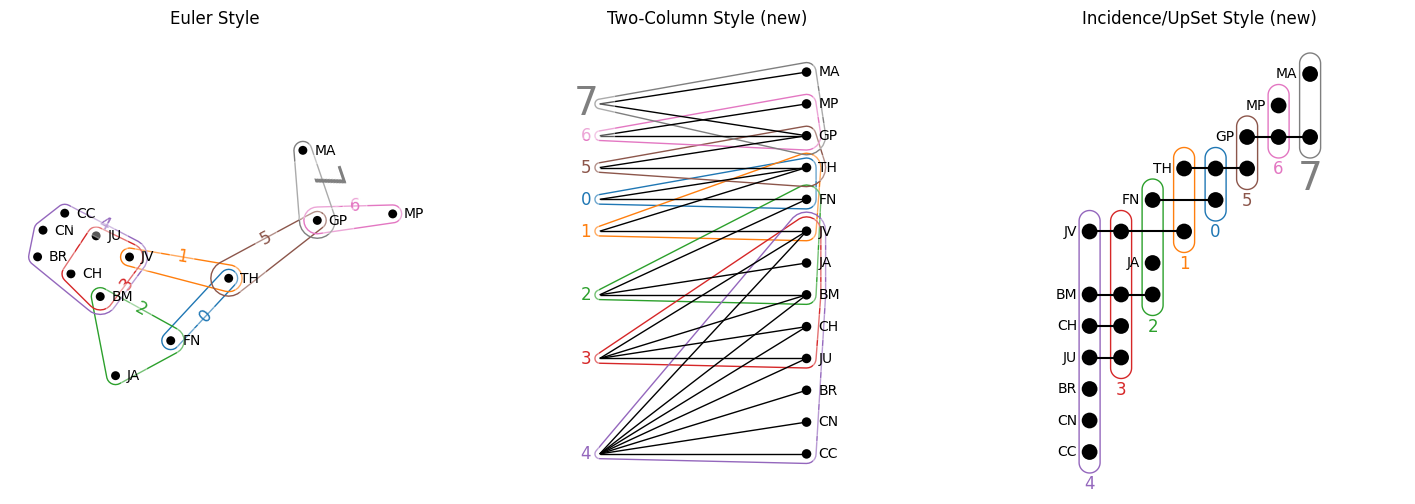

In [25]:
draw_each(H,
    edge_labels_kwargs={
        'fontsize': lambda x: 28 if x==7 else 12
    })

## Font color
Font color can be adjusted using the node_labels_kwargs and edge_labels_kwargs parameters by specifying values for the color attribute.

* Pass a **string** to set a uniform font color for all nodes or edges.
* Pass an **array**, **dictionary**, or **function** to define individual font colors dynamically.

Font color customization is integrated with font size adjustments to enhance overall appearance and readability.

### String

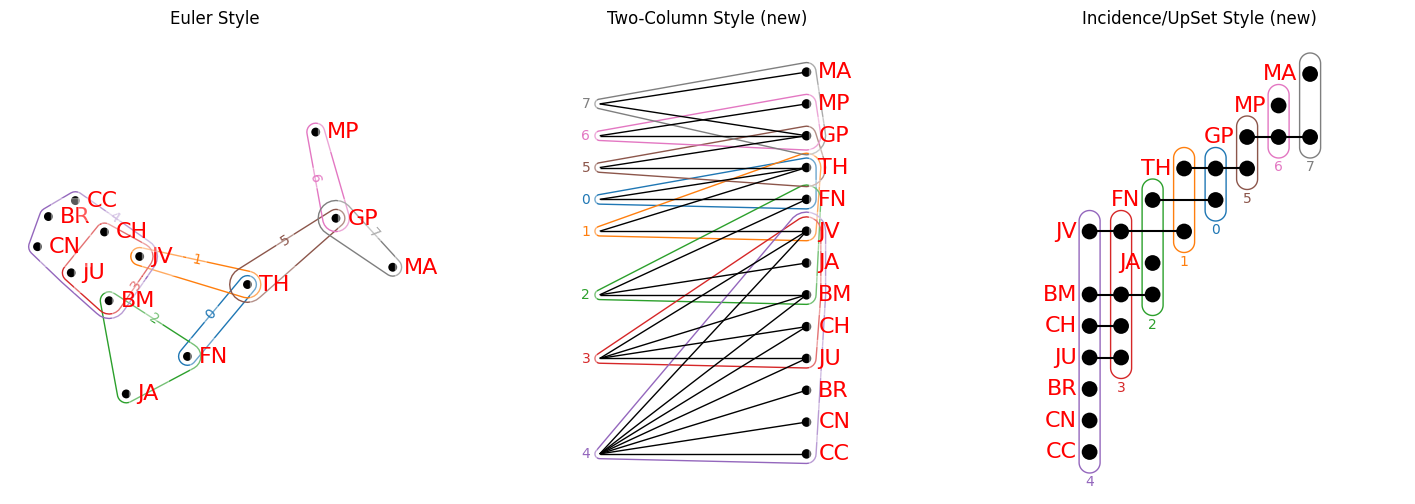

In [26]:
draw_each(H, 
    node_labels_kwargs={
        'color': 'red', 
        'fontsize': 16
    })

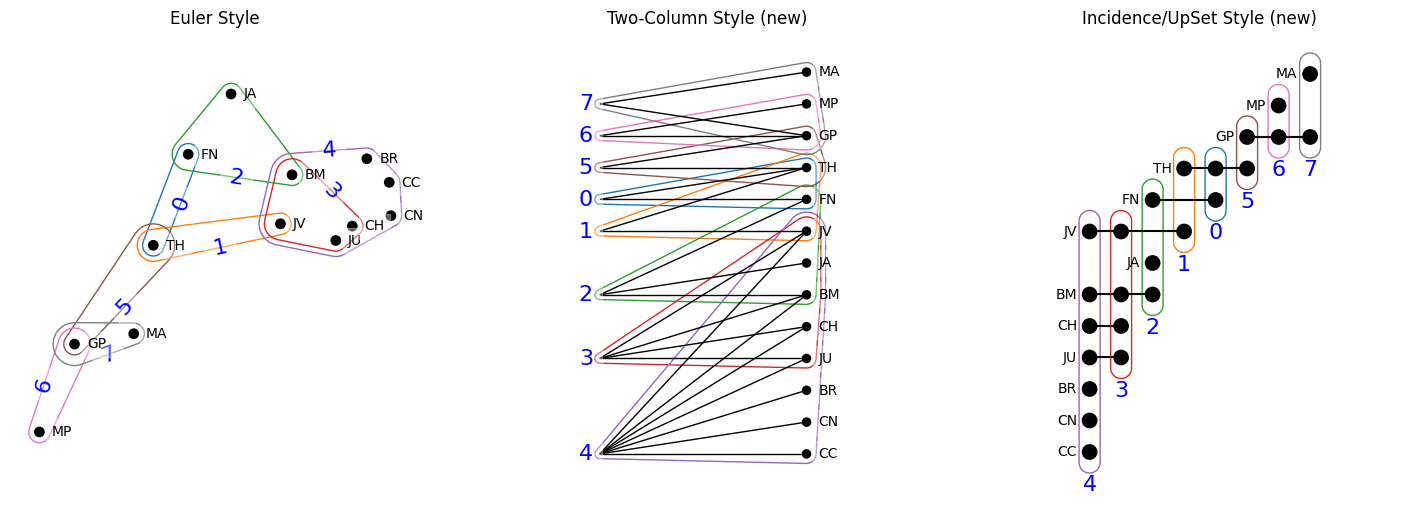

In [27]:
draw_each(H, 
    edge_labels_kwargs={
        'color': 'blue',
        'fontsize': 16,
    })

### Array

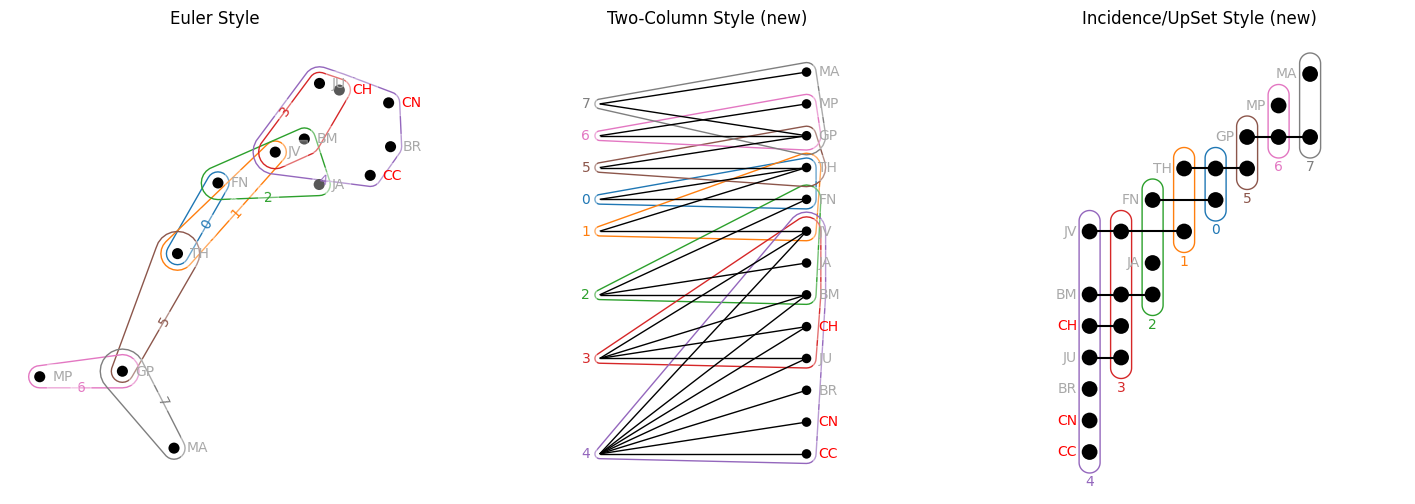

In [28]:
draw_each(H, 
    node_labels_kwargs={
        'color': [
            'red' if 'C' in v else 'darkgrey' for v in H    
        ]
    })

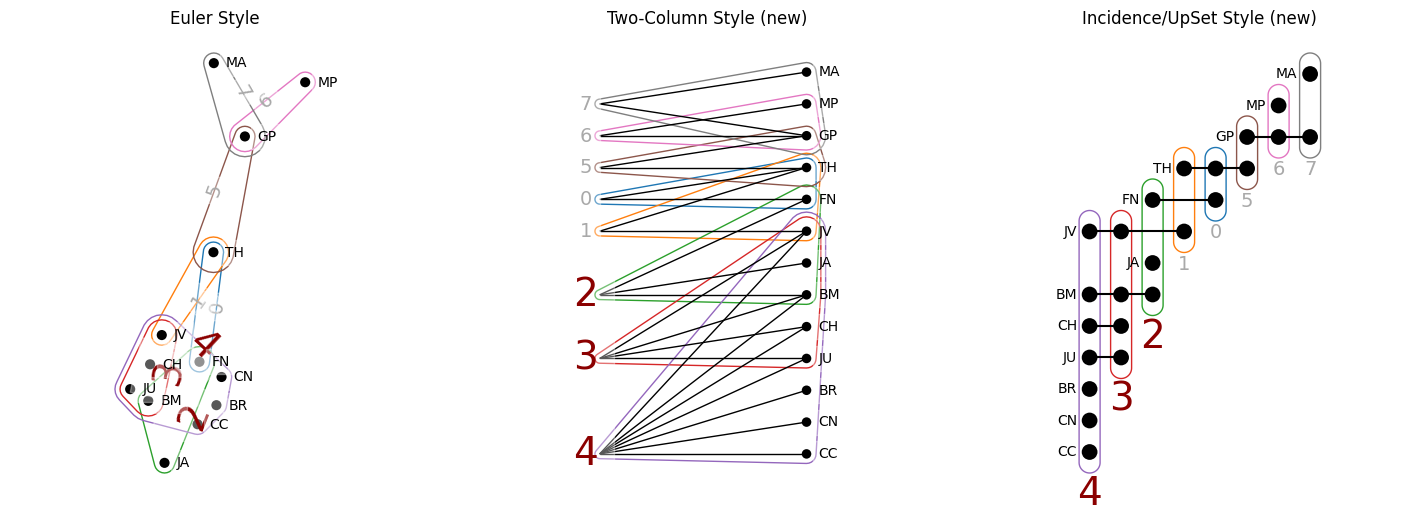

In [29]:
draw_each(H, 
    edge_labels_kwargs={
        'fontsize': [28 if H.size(v) > 2 else 14 for v in H.edges()],
        'color': [
            'darkred' if H.size(v) > 2 else 'darkgrey' for v in H.edges()
        ]
    })

### Dictionary

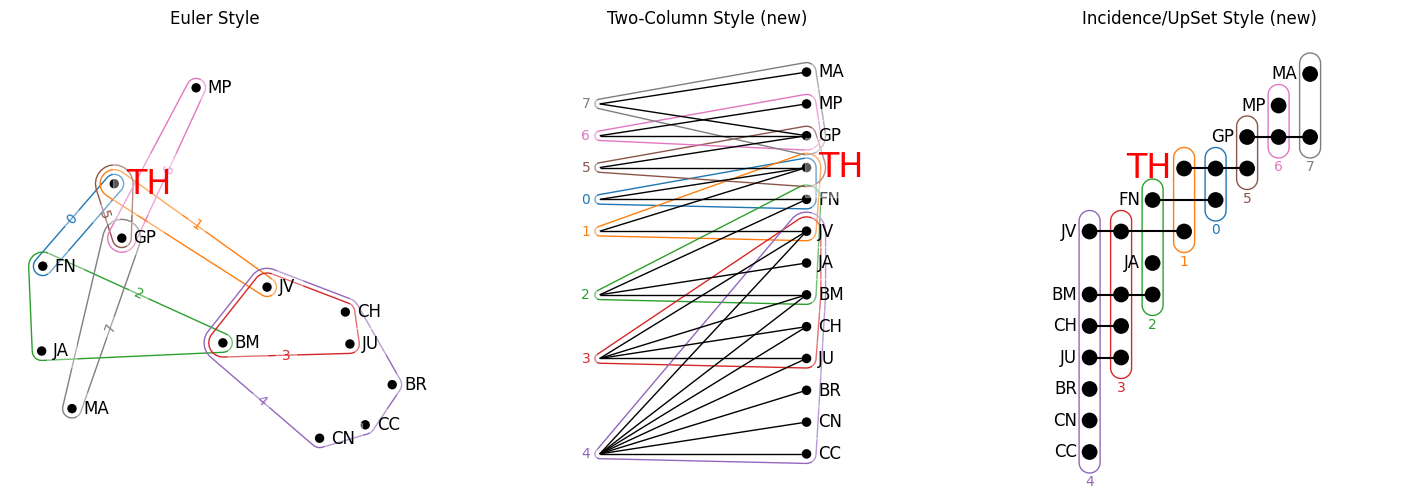

In [30]:
draw_each(H, 
    node_labels_kwargs={
        'fontsize': {
            v: 24 if v=='TH' else 12 for v in H
        },
        'color': {
            v: 'red' if v=='TH' else 'black' for v in H
        }
    })

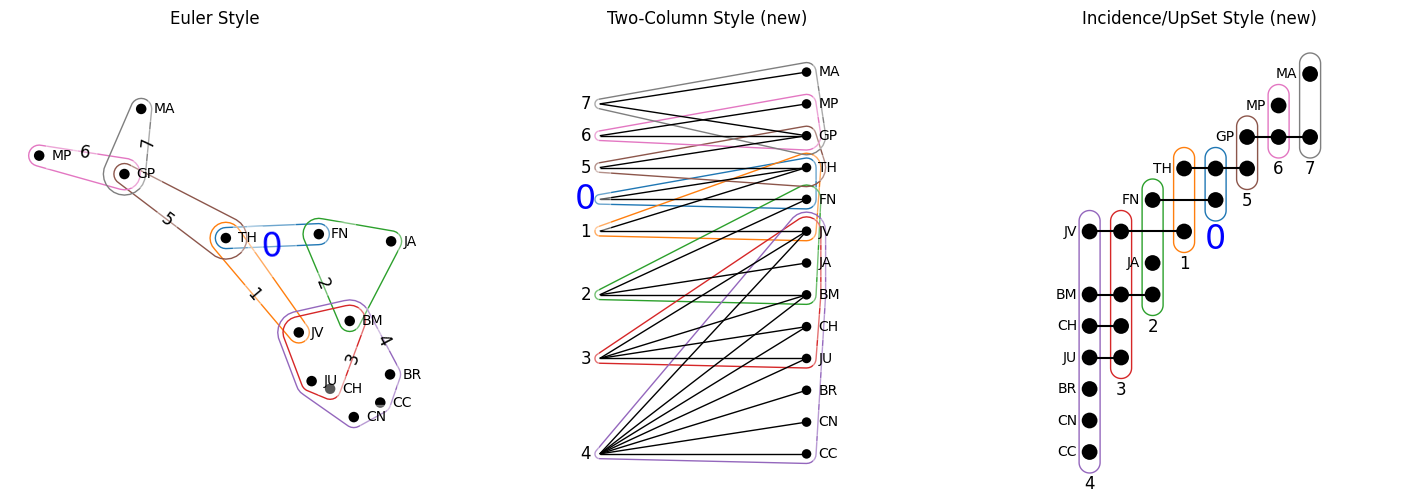

In [31]:
draw_each(H, 
    edge_labels_kwargs={
        'fontsize': {
            v: 24 if v==0 else 12 for v in H.edges()
        },
        'color': {
            v: 'blue' if v==0 else 'black' for v in H.edges()
        }
    })

### Function

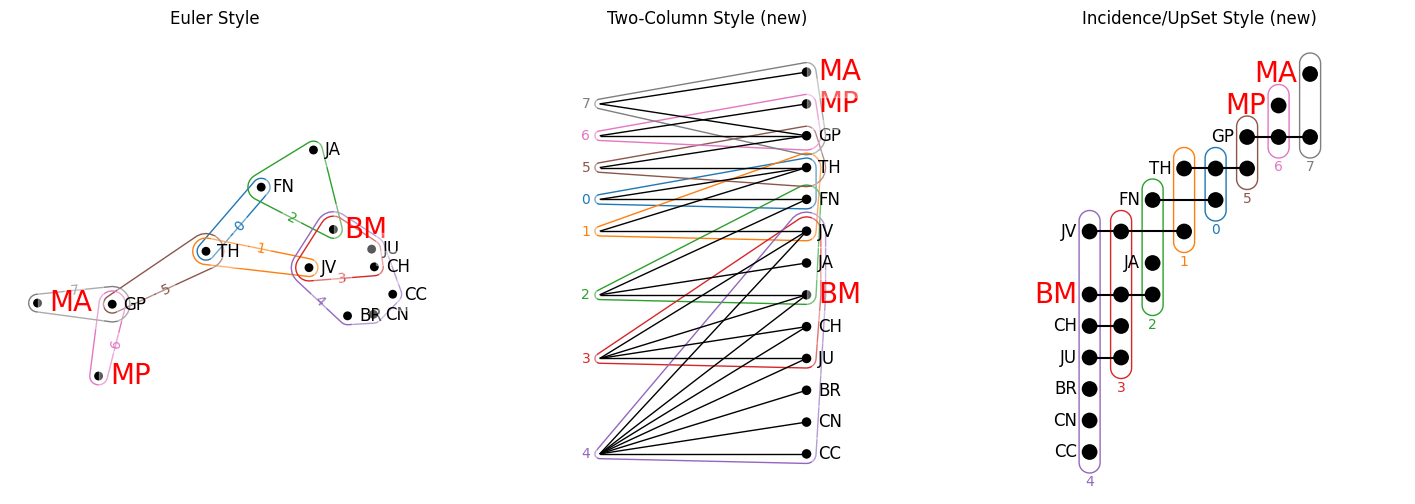

In [32]:
draw_each(H, 
    node_labels_kwargs={
        'fontsize': lambda x: 20 if 'M' in x else 12,
        'color': lambda x: 'red' if 'M' in x else 'black'
    })

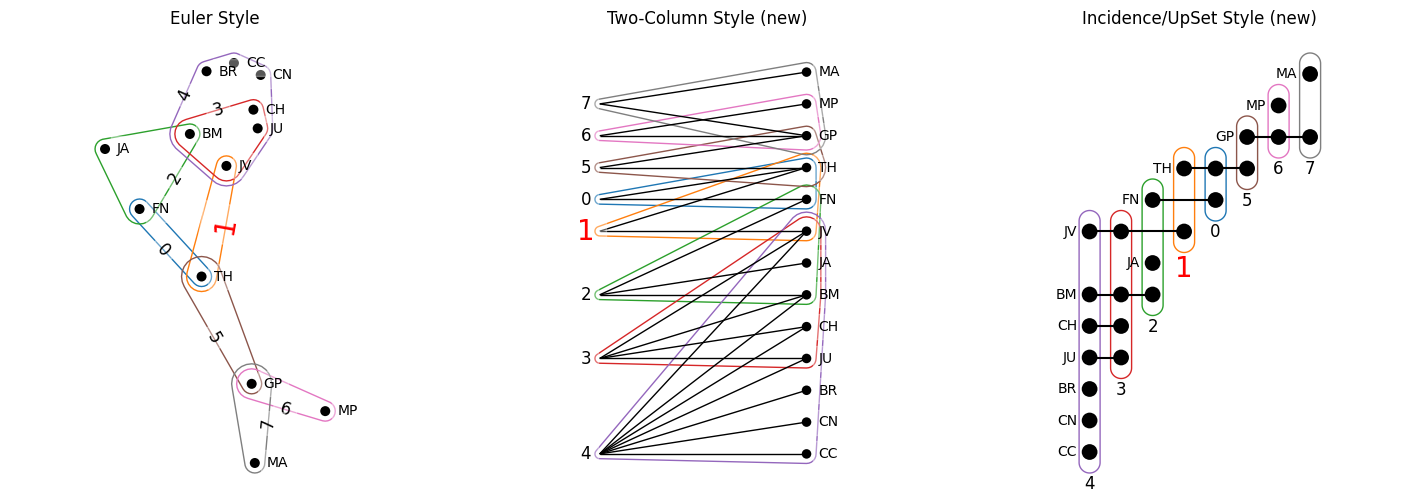

In [33]:
draw_each(H, 
    edge_labels_kwargs={
        'fontsize': lambda x: 20 if x==1 else 12,
        'color': lambda x: 'red' if x == 1 else 'black'
    })